#### Initialization
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

##### settings

In [218]:
# install libraries
!pip install pymysql
!pip install translate
!pip install sqlalchemy

# libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
import scipy.stats as st
import missingno as msno
import re
import math
import collections
from matplotlib import rcParams
from matplotlib import gridspec
from sklearn import linear_model
from IPython.display import display
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
%matplotlib inline

# params
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# pd.set_option("display.max_columns", None)
# # pd.set_option("display.float_format", "{:.2f}".format)
# # pd.options.display.float_format = "{:.2f}".format
# 
# mpl.rcParams["text.color"] = "g"
# plt.style.use("fivethirtyeight")
# 
# params = {"legend.fontsize":"x-large",
#           "figure.figsize":(30, 15),
#           "lines.linewidth":1.5,
#           "axes.labelsize":"x-large",
#           "axes.labelpad":15,
#           "axes.labelweight":"bold",
#           "axes.titlesize":35,
#           "axes.titleweight":"bold",
#           "xtick.labelsize":"x-large",
#           "ytick.labelsize":"x-large"}
# mpl.rcParams.update(params)

# mount drive
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### functions

In [219]:
# most basic info
def getInfo(data):

    # check data info with detailed memory usage, cause why not..
    print("CHECK DATA INFO (WITH DETAILED MEMORY USGAE, CAUSE WHY NOT..)")
    print("-" * 109)
    print(f"{data.info(memory_usage='deep')}\n")
    print(f"{data.memory_usage(deep=True)}")

In [220]:
# more detailed info in one go
def moreInfo(data):
    
    # more data info
    print(f"MORE DATA INFO :")
    print("-" * 109)

    print(f"Data shape : {data.shape}\n")

    # counts no. of rows
    print(f"Total rows in the dataset : {len(data):,}")

    # counts no. of columns
    print(f"Total columns in the dataset : {len(data.columns):,}")

    # counts no. of duplicates
    print(f"Total duplicated values : {str(data.duplicated().sum())}")

    # counts no. of missing values
    print(f"Total null values : {data.isnull().sum().sum():,}")

    # compute missing/duplicates ratio
    print(f"\nRATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :")
    print("-" * 109)

    # ratio for missing values
    isnull_ratio = (data.isnull().sum().sum() / len(data)) * 100

    # ratio for duplicated values
    dup_ratio = (data.duplicated().sum() / len(data)) * 100

    # return results
    print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
    print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")
    print("\n")

    # count no. of values per column
    print(f"\nCOUNT VALUES FOR EACH COLUMN :")
    print("-" * 109)
    for column in data.columns:
        countValues = data[column].value_counts(dropna=False).to_frame()
        totalValues = data[column].count()
        print(f"VALUE_COUNTS for column '{column}' : {len(countValues)} rows, {totalValues} values in Total\n")
        display(countValues)
        print("-" * 109)

    # displays no. of missing values per column
    print(f"\nTOTAL MISSING VALUES FOR EACH COLUMN :")
    display(data.isnull().sum().to_frame().rename(columns={0: "MISSING VALUES"}))
    print("\n")

    # displays rows where missing values are found
    print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :")
    display(data[data.isnull().any(axis=1)])
    print("\n")

    # do quick descriptive statistics
    print(f"QUICK DESCRIPTIVE ANALYSIS :")
    print("-" * 109)
    display(data.describe())
    print("\n")

    # categorical statistics
    print(f"NON-NUMERICAL STATISTICS :")
    print("-" * 109)
    display(data.describe(exclude="number"))
    print("\n")

    # view all unique values for each column
    print(f"UNIQUE VALUES FOR EACH COLUMN :")
    print("-" * 109)

    for column in data.columns:
        uniqueValues = data[column].unique()
        uniqueCount = data[column].nunique()
        print(f"UNIQUE VALUES for column '{column}' : {len(uniqueValues)} including NaN values, {uniqueCount} excluding Nan values\n")
        print(f"{uniqueValues}\n")
        print("-" * 109)

In [221]:
# selective call to function
class dataProfiling:

    def moreInfo(self, data):    
        # more data info
        print(f"MORE DATA INFO :")
        print("-" * 109)

        print(f"Data shape : {data.shape}\n")

        # counts no. total values in the data
        print(f"No. of values in the dataset : {data.size:,}")

        # counts no. of rows
        print(f"Total rows in the dataset : {len(data):,}")

        # counts no. of columns
        print(f"Total columns in the dataset : {len(data.columns):,}")

        # counts no. of missing values
        print(f"\nTotal null values : {data.isnull().sum().sum():,}")

        # counts no. of duplicates
        countDuplicates = data.duplicated().sum()
        print(f"Total duplicated rows : {format(countDuplicates, ',')}")

        # compute missing/duplicates ratio
        print(f"\nRATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :")
        print("-" * 109)

        # ratio for missing values
        isnull_ratio = (data.isnull().sum().sum() / data.size) * 100

        # ratio for duplicated values
        dup_ratio = (data.duplicated().sum() / len(data)) * 100

        # return results
        print(f"\nPercentage of null values in the data : {round(isnull_ratio, 2)}%")
        print(f"Percentage of duplicates in the data : {round(dup_ratio, 2)}%")
        print("\n")

    def valueCounts(self, data):
        # count no. of values per column
        print(f"\nCOUNT VALUES FOR EACH COLUMN :")
        print("-" * 109)
        for column in data.columns:
            countValues = data[column].value_counts(dropna=False).to_frame()
            totalValues = data[column].count()
            print(f"VALUE_COUNTS for column '{column}' : {len(countValues)} rows, {totalValues} values in Total\n")
            display(countValues)
            print("-" * 109)

    def nullColumns(self, data):
        # displays no. of missing values per column
        print(f"\nTOTAL MISSING VALUES FOR EACH COLUMN :")
        display(data.isnull().sum().to_frame().rename(columns={0: "MISSING VALUES"}))
        print("\n")

    def nullGroupby(self, data, column):
        # displays no. of missing values per category
        print(f"\nTOTAL MISSING VALUES PER COLUMN FOR EACH UNIQUE VALUE :")        
        display(data.isna().groupby(data[column]).sum())

        print("\n")
    def visualizeNulls(self, data):
        # visualize missing values
        print(f"VISAULIZE MISSNG VALUES :")
        print("-" * 109)

        # method 1
        print("METHOD 1")
        sns.heatmap(data.isnull().T,
                    xticklabels=False,
                    cmap="viridis",
                    cbar_kws={"label": "Missing Values"})

        plt.tight_layout()
        plt.show()
        print("\n")

        # method 2
        print("METHOD 2")
        plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
        plt.xlabel("Column Number")
        plt.ylabel("Sample Number");
        print("\n")

    def nullFeature(self, data, column):
        # displays rows where missing values are found of a specific column 
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND OF A SPECIFIC FEATURE:")
        display(data[data[column].isna()])
        print("\n")

    def nullData(self, data):
        # displays rows where missing values are found
        print(f"DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :")
        display(data[data.isnull().any(axis=1)])
        print("\n")

    def allStats(self, data):
        # overall descerptive analysis (nuemrical and categorical)
        print(f"FULL DATA DESCRIPTIVE STATISTICS :")
        print("-" * 109)
        display(data.describe(include="all"))
        print("\n")

    def descriptiveData(self, data):
        # do quick descriptive statistics
        print(f"QUICK DESCRIPTIVE ANALYSIS :")
        print("-" * 109)
        display(data.describe())
        print("\n")

    def nonNumericStats(self, data):
        # categorical statistics
        print(f"NON-NUMERICAL STATISTICS :")
        print("-" * 109)
        display(data.describe(exclude="number"))
        print("\n")

    def uniqueColumns(self, data):
        # view all unique values for each column
        print(f"UNIQUE VALUES FOR EACH COLUMN :")
        print("-" * 109)

        for column in data.columns:
            uniqueValues = data[column].unique()
            uniqueCount = data[column].nunique()
            print(f"UNIQUE VALUES for column '{column}' : {len(uniqueValues)} including NaN values, {uniqueCount} excluding Nan values\n")
            print(f"{uniqueValues}\n")
            print("-" * 109)

    def plotUniques(self, data):
        # for each numerical feature compute number of unique entries
        unique_values = data.select_dtypes(include="number").nunique().sort_values()

        # plot information with y-axis in log-scale
        unique_values.plot.bar(logy=False, title="No. of unique values per feature", figsize=(25,7))
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

# instance of the dataProfiling class
profiler = dataProfiling()

### Part 1: Upload the data

In [222]:
data = pd.read_excel("/content/drive/MyDrive/[01] Data Analytics - IronHack/[06] Courses/Module 1/Week 3/Day 14 - Thursday/[LAB 33] - Data Preparation/example_data_cleaning.xlsx")
dataBackup = data.copy()

### Part 2: Analyze your data and create a plan for data preparation

**RECALL METHODS :**

```python
# use these methods to analyze the data
profiler.moreInfo(data)
profiler.valueCounts(data)
profiler.nullColumns(data)
profiler.nullGroupby(data, column)
profiler.visualizeNulls(data)
profiler.nullFeature(data, column)
profiler.nullData(data)
profiler.descriptiveData(data)
profiler.nonNumericStats(data)
profiler.uniqueColumns(data)
profiler.plotUniques(data)
```

#### Investigate data

In [223]:
# view data
data.head()

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,4,34985,1923.00,5670,manager,78,Low
1,16,34997,1923.00,2399090,developer,78,High
2,25,35006,1923.00,33050,HR,78,High
3,12,34993,1939.14,23430,professor,78,Low
4,21,35002,1939.14,16770,manager,78,Low


In [224]:
# get info
getInfo(data)

CHECK DATA INFO (WITH DETAILED MEMORY USGAE, CAUSE WHY NOT..)
-------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  30 non-null     int64  
 1   ClientID       30 non-null     int64  
 2   BirthYear      28 non-null     float64
 3   Amount         30 non-null     int64  
 4   Profession     28 non-null     object 
 5   Department     30 non-null     int64  
 6   Risk           30 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.9 KB
None

Index             128
TransactionID     240
ClientID          240
BirthYear         240
Amount            240
Profession       1834
Department        240
Risk             1842
dtype: int64


In [225]:
# data overview report
profiler.moreInfo(data)

MORE DATA INFO :
-------------------------------------------------------------------------------------------------------------
Data shape : (30, 7)

No. of values in the dataset : 210
Total rows in the dataset : 30
Total columns in the dataset : 7

Total null values : 4
Total duplicated rows : 0

RATIO OF MISSING AND DUPLICATED VALUES IN OUR DATA :
-------------------------------------------------------------------------------------------------------------

Percentage of null values in the data : 1.9%
Percentage of duplicates in the data : 0.0%




In [226]:
# examine the frequency of each unique value within each column
profiler.valueCounts(data)


COUNT VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'TransactionID' : 30 rows, 30 values in Total



,TransactionID
4,1
16,1
22,1
13,1
2,1
1,1
26,1
14,1
23,1
18,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'ClientID' : 23 rows, 30 values in Total



,ClientID
34987,3
35008,3
34988,2
34991,2
34989,2
34983,1
34982,1
35007,1
34995,1
34999,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'BirthYear' : 16 rows, 28 values in Total



,BirthYear
1967.00,5
1923.00,3
1988.00,3
1999.00,3
1939.14,2
1943.86,2
1978.00,2
NaN,2
1945.00,1
1948.57,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Amount' : 22 rows, 30 values in Total



,Amount
27870,2
16770,2
25650,2
14550,2
12330,2
10110,2
18990,2
7890,2
46370,1
12900,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Profession' : 17 rows, 28 values in Total



,Profession
Manager,5
etudient,3
HR,3
manager,2
student,2
barmen,2
NaN,2
BDM,2
Driver,1
Student,1


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Department' : 1 rows, 30 values in Total



,Department
78,30


-------------------------------------------------------------------------------------------------------------
VALUE_COUNTS for column 'Risk' : 3 rows, 30 values in Total



,Risk
Medium,11
Low,10
High,9


-------------------------------------------------------------------------------------------------------------


In [227]:
# summary of missing values for each column
profiler.nullColumns(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
TransactionID,0
ClientID,0
BirthYear,2
Amount,0
Profession,2
Department,0
Risk,0


In [228]:
# view all rows with NaN values
profiler.nullData(data)

DISPLAYS ROWS WHERE MISSING VALUES ARE FOUND :


,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
15,28,35008,1967.00,46370,NaN,78,High
16,29,35008,1976.00,50810,NaN,78,Medium
28,22,34987,NaN,18990,sailer,78,High
29,7,34988,NaN,12330,Manager,78,Medium


<Axes: title={'center': 'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

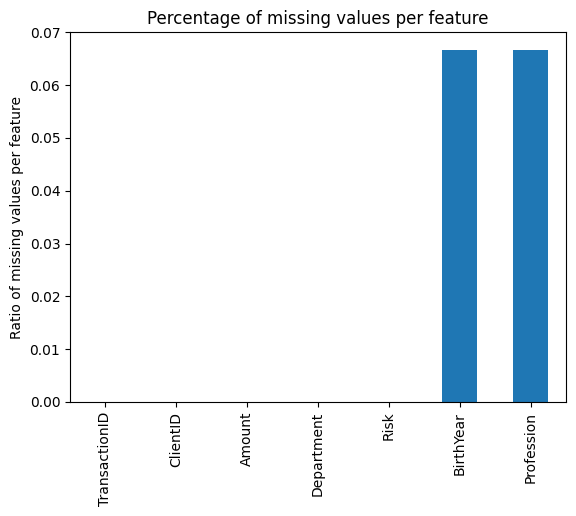

In [229]:
# method 1
data.isna().mean().sort_values().plot(kind="bar", title="Percentage of missing values per feature", ylabel="Ratio of missing values per feature")

<Axes: >

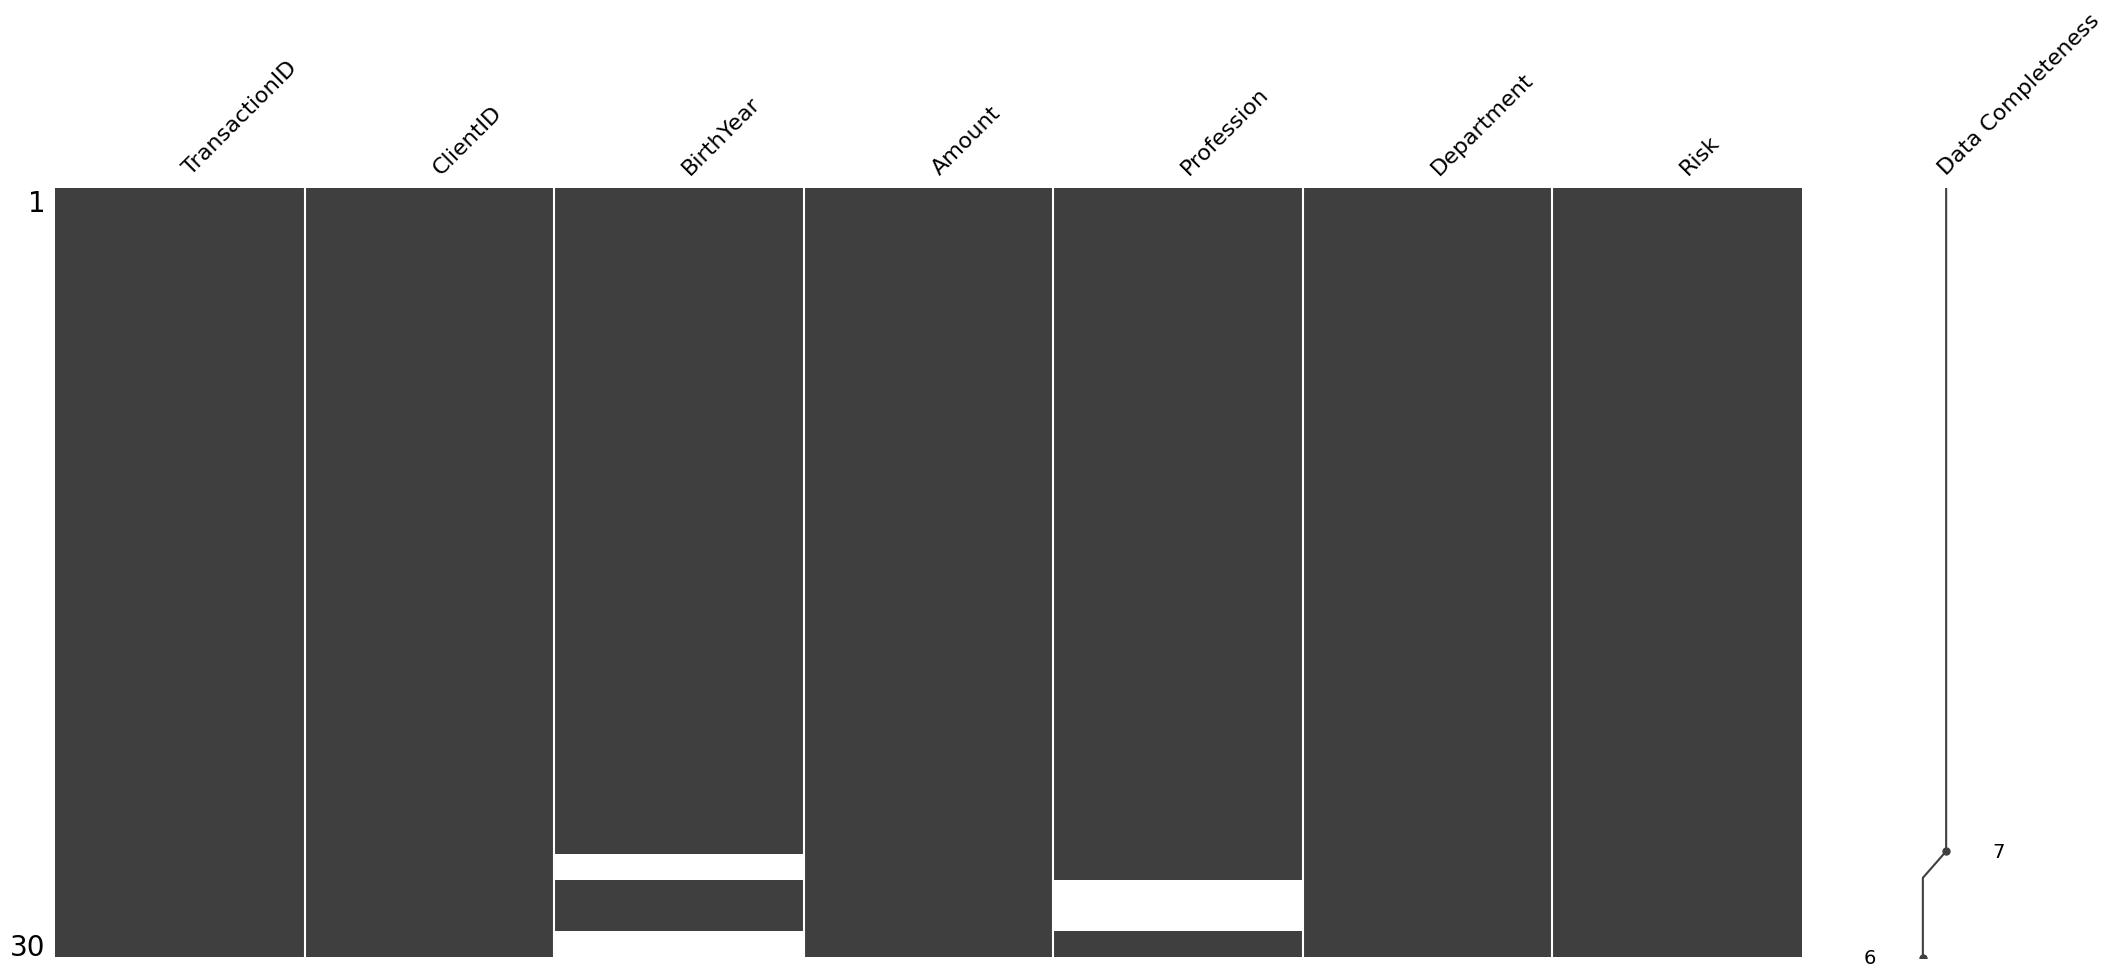

In [230]:
# method 2
msno.matrix(data, labels=True, sort="descending")

<Axes: >

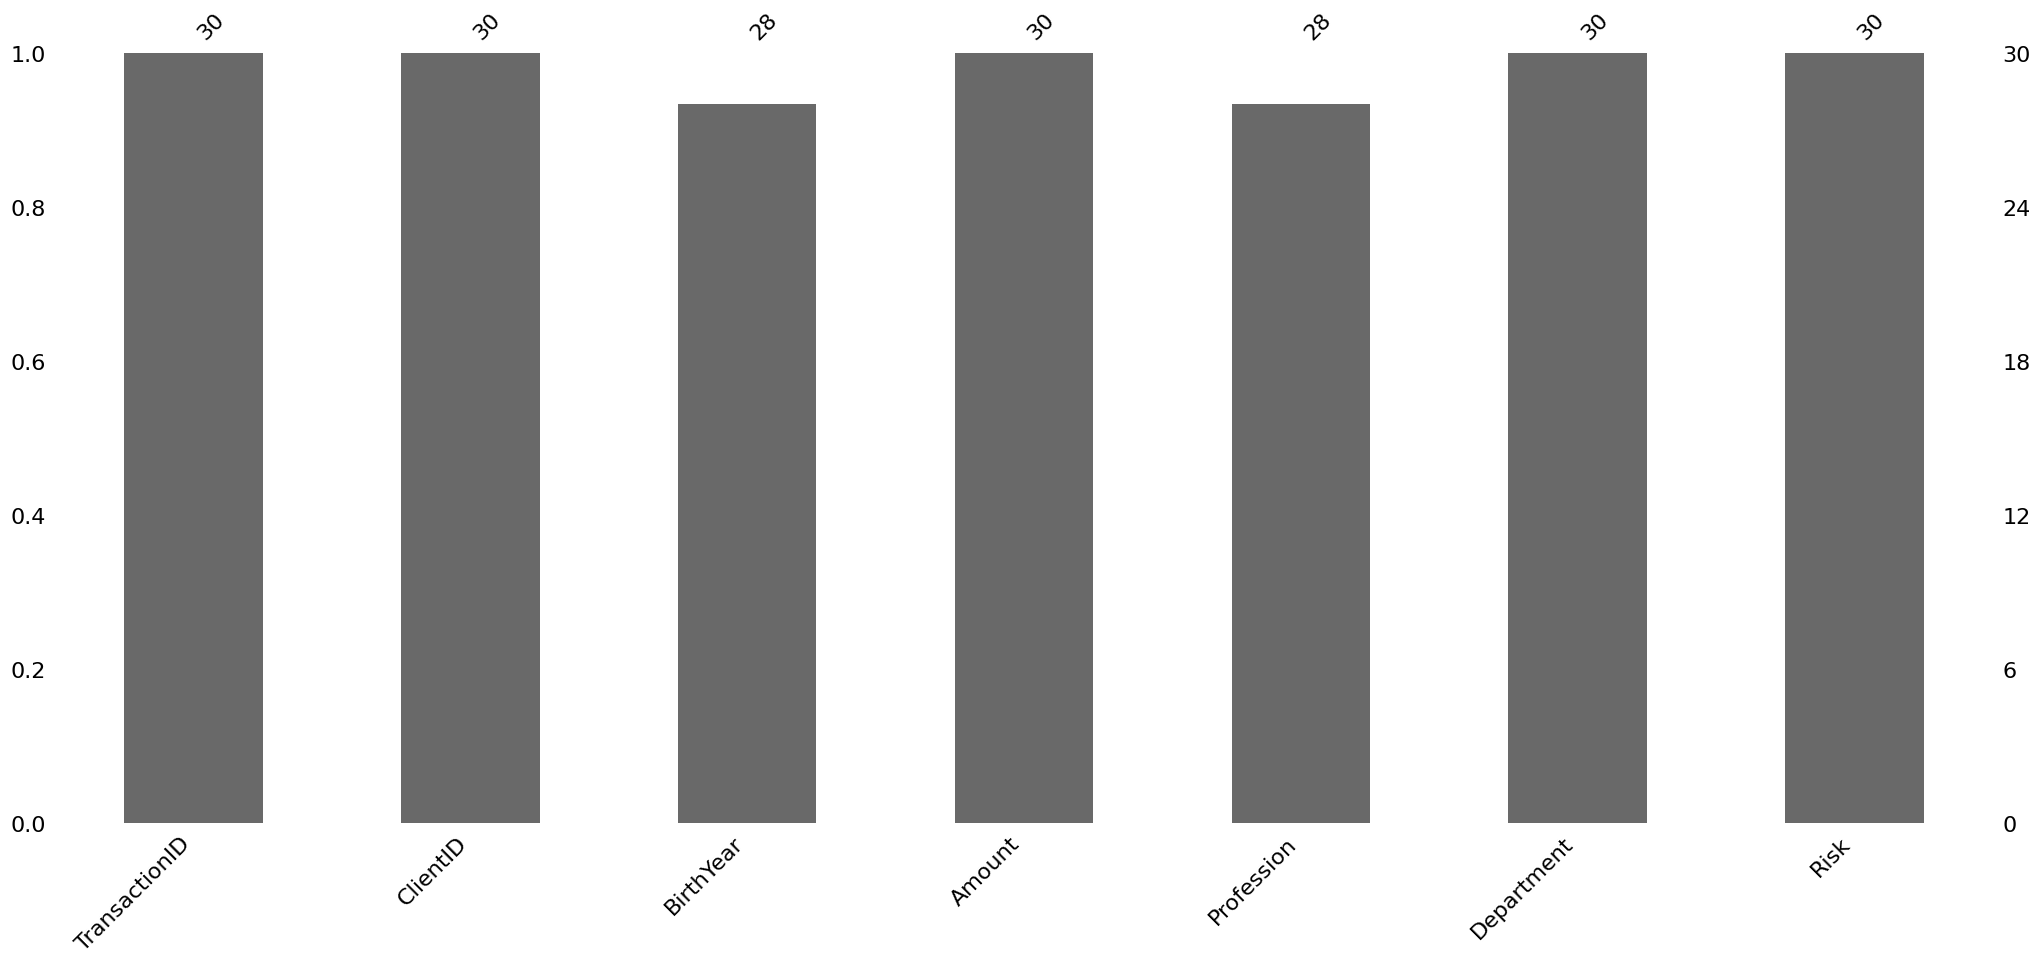

In [231]:
# method 3
msno.bar(data)

In [232]:
# numerical descriptive statistics
profiler.descriptiveData(data)

QUICK DESCRIPTIVE ANALYSIS :
-------------------------------------------------------------------------------------------------------------


,TransactionID,ClientID,BirthYear,Amount,Department
count,30.00,30.00,28.00,30.00,30.00
mean,15.50,34993.83,1968.32,101009.67,78.00
std,8.80,8.13,27.96,434261.57,0.00
min,1.00,34982.00,1923.00,1230.00,78.00
25%,8.25,34987.25,1944.71,12330.00,78.00
50%,15.50,34991.50,1967.00,18990.00,78.00
75%,22.75,34999.75,1988.00,29535.00,78.00
max,30.00,35008.00,2017.00,2399090.00,78.00


In [233]:
# categorical descriptive statistics
profiler.nonNumericStats(data)

NON-NUMERICAL STATISTICS :
-------------------------------------------------------------------------------------------------------------


,Profession,Risk
count,28,30
unique,16,3
top,Manager,Medium
freq,5,11


In [234]:
# unique values for each column
profiler.uniqueColumns(data)

UNIQUE VALUES FOR EACH COLUMN :
-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'TransactionID' : 30 including NaN values, 30 excluding Nan values

[ 4 16 25 12 21 11 20  3 19  9  8  6 15 24 27 28 29  5 17 10 30 18 23 14
 26  1  2 13 22  7]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'ClientID' : 23 including NaN values, 23 excluding Nan values

[34985 34997 35006 34993 35002 34992 35001 34984 35000 34990 34989 34987
 35008 34986 34998 34991 34999 34988 34995 35007 34982 34983 34994]

-------------------------------------------------------------------------------------------------------------
UNIQUE VALUES for column 'BirthYear' : 16 including NaN values, 15 excluding Nan values

[1923.         1939.14285714 1943.85714286 1945.         1948.57142857
 1953.28571429 1958.         1967.         1976.         1978

#### Strategy

**WHAT HAVE WE IDENTIFIED SO FAR :**

- **BirthYear** : not in the right data type and few values are in decimals
- **ClientID** : check for duplicates
- **Profession** : irregular case letter and repeated values (Manager, manager)
- **Department** : only one unique value
- No duplicates
- NaN values : total of 4 (occupying 1.9% of the data)
- Columns with NaN values :
    - **BirthYear** (2)
    - **Profession** (2)


**WHAT SHOULD WE DO ABOUT IT :**
- **BirthYear** :
    - fix dates on decimals
    - change float to datetime
    - maybe add Age column if we feel awesome enough
    - impute missing values, few methods :
        1. mean, median, mode or KNN based on profession
        2. mean, median, mode or KNN according to the overall distribution of the dataframe
        3. mean, median, mode or KNN based on the spending amount, as higher expenditures may indicate an adult rather than a student
        4. impute NaN with ***Unknown*** may be an option
- **ClientID** : examine duplicate values to determine the reasons for their recurrence
- **Profession** :
    - convert all text to a consistent letter case
    - mean, median, mode or KNN depending on the birth year and/or spending amount
    - impute NaN with ***Unknown*** may be an option
- **Department** : may drop the column

### Part 3: Data cleansing (missing values, outliers, duplicates, data consistently)

#### **Profession** column

<Axes: >

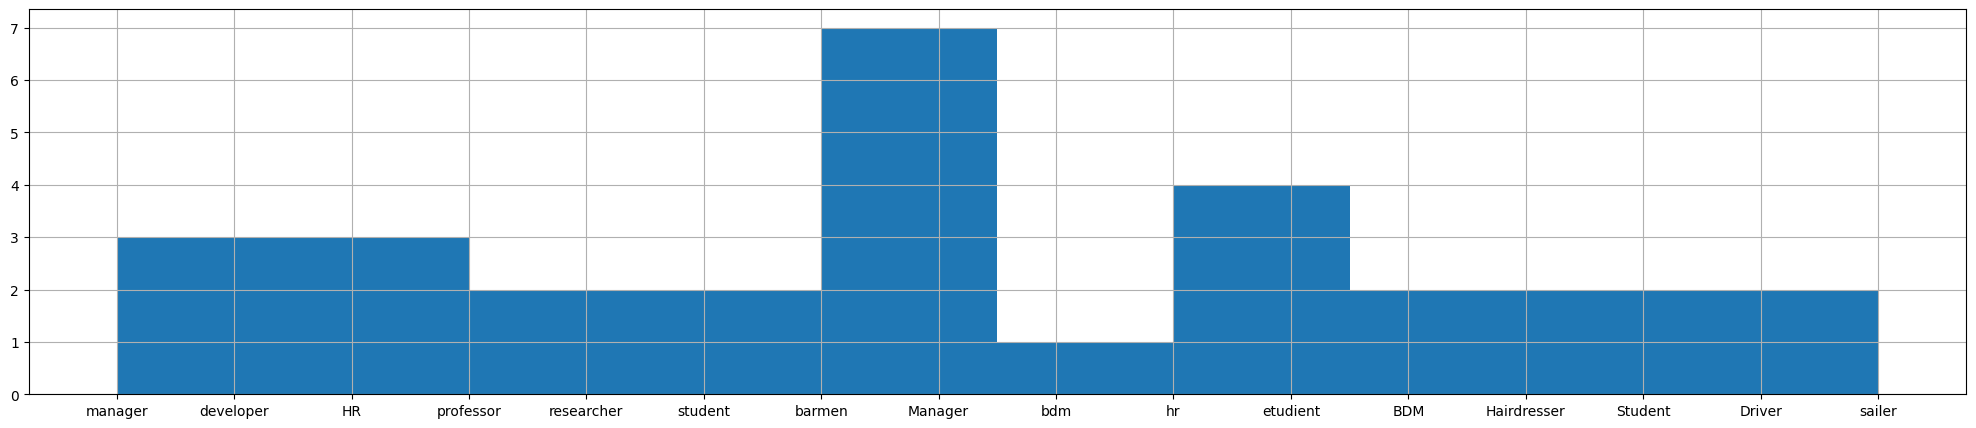

In [235]:
# distribution of people across professions
data["Profession"].hist(figsize=(25,5))

In [236]:
# convert Profession column to Title case
data["Profession"] = data["Profession"].str.upper()

# translate ETUDIENT to english
data["Profession"].replace("ETUDIENT", "STUDENT", inplace=True)

# check results
data["Profession"].unique()

array(['MANAGER', 'DEVELOPER', 'HR', 'PROFESSOR', 'RESEARCHER', 'STUDENT',
       'BARMEN', 'BDM', nan, 'HAIRDRESSER', 'DRIVER', 'SAILER'],
      dtype=object)

In [237]:
# overview of Profession column with NaN values
data[data["Profession"].isnull()][["Profession", "Amount", "BirthYear", "Risk"]]

,Profession,Amount,BirthYear,Risk
15,NaN,46370,1967.00,High
16,NaN,50810,1976.00,Medium


In [238]:
# check each profession's aggreagated Amount column
data.groupby("Profession")[["Amount"]].agg(["min", "mean", "median", "max"]).sort_values(by=("Amount", "min"), ascending=False)

Amount                               
                 min       mean     median      max
Profession                                         
DEVELOPER    2399090 2399090.00 2399090.00  2399090
HAIRDRESSER    27870   27870.00   27870.00    27870
DRIVER         25650   25650.00   25650.00    25650
PROFESSOR      23430   23430.00   23430.00    23430
RESEARCHER     21210   21210.00   21210.00    21210
BDM            18990   38723.33   41930.00    55250
SAILER         18990   18990.00   18990.00    18990
HR              7890   20840.00   21210.00    33050
MANAGER         5670   16770.00   16770.00    30090
STUDENT         3450   14398.33   11505.00    37490
BARMEN          1230    6780.00    6780.00    12330

Insights are okay, we can do better, let's move on..

In [239]:
# retrieve people with Amount between 45000 and 55000
data[data["Amount"].between(45000, 55000)]

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
15,28,35008,1967.00,46370,NaN,78,High
16,29,35008,1976.00,50810,NaN,78,Medium


Not helping, keep going..

In [240]:
# compare Amount by Profession
for i in data["Profession"].unique():
    z = data[data["Profession"] == str(i)][["Profession", "Amount", "BirthYear", "Risk"]]
    display(z)
    print("\n")

,Profession,Amount,BirthYear,Risk
0,MANAGER,5670,1923.00,Low
4,MANAGER,16770,1939.14,Low
9,MANAGER,16770,1953.29,Medium
11,MANAGER,10110,1967.00,Medium
12,MANAGER,30090,1967.00,Low
22,MANAGER,25650,1999.00,Low
29,MANAGER,12330,NaN,Medium


,Profession,Amount,BirthYear,Risk
1,DEVELOPER,2399090,1923.00,High


,Profession,Amount,BirthYear,Risk
2,HR,33050,1923.00,High
10,HR,14550,1958.00,High
13,HR,27870,1967.00,Medium
17,HR,7890,1978.00,High


,Profession,Amount,BirthYear,Risk
3,PROFESSOR,23430,1939.14,Low


,Profession,Amount,BirthYear,Risk
5,RESEARCHER,21210,1943.86,Medium


,Profession,Amount,BirthYear,Risk
6,STUDENT,14550,1943.86,Medium
7,STUDENT,3450,1945.00,Medium
18,STUDENT,7890,1978.00,Medium
21,STUDENT,10110,1988.00,Low
24,STUDENT,37490,1999.00,Medium
25,STUDENT,12900,2013.00,Low


,Profession,Amount,BirthYear,Risk
8,BARMEN,12330,1948.57,High
26,BARMEN,1230,2015.00,High


,Profession,Amount,BirthYear,Risk
14,BDM,41930,1967.00,Low
19,BDM,18990,1988.00,Low
20,BDM,55250,1988.00,High


,Profession,Amount,BirthYear,Risk


,Profession,Amount,BirthYear,Risk
23,HAIRDRESSER,27870,1999.00,Low


,Profession,Amount,BirthYear,Risk
27,DRIVER,25650,2017.00,Medium


,Profession,Amount,BirthYear,Risk
28,SAILER,18990,NaN,High


BINGO! Now we're getting somewhere.

-  based on the NaN values's Amount column (46370, 50810), <br> the closest **Profession** we get is ***BDM*** (which ranges from 18990 to 55250)
- we'll imputate NaN values with BDM as their profession
- but since we are curious creatures, let's **add a new column** called ***Profession_KNN*** to see what KNN will bring us
    - ***From the future*** : didn't work, still left NaN values but still labeled it as 11
    - so I added a code just above to fill in NaN values with BDM
    ```python
    # impute NaN values with BDM
    data["Profession"].fillna("BDM", inplace=True)
    ```
    - at least, no missing values for Profession anymore.. 🙄

In [241]:
# impute NaN values with BDM
data["Profession"].fillna("BDM", inplace=True)

# BONUS : convert strings to numerical values so we can use KNN imputer

# encode the "Profession" column using label encoding
label_encoder = LabelEncoder()
data["Profession_Label"] = label_encoder.fit_transform(data["Profession"].astype(str))

# using KNN imputer
imputer = KNNImputer(n_neighbors=5)
data["Profession_KNN"] = imputer.fit_transform(data[["Profession_Label"]])

# view data
data[["Profession", "Profession_KNN", "Amount", "BirthYear", "Risk", "Profession_Label"]]

,Profession,Profession_KNN,Amount,BirthYear,Risk,Profession_Label
0,MANAGER,6.00,5670,1923.00,Low,6
1,DEVELOPER,2.00,2399090,1923.00,High,2
2,HR,5.00,33050,1923.00,High,5
3,PROFESSOR,7.00,23430,1939.14,Low,7
4,MANAGER,6.00,16770,1939.14,Low,6
5,RESEARCHER,8.00,21210,1943.86,Medium,8
6,STUDENT,10.00,14550,1943.86,Medium,10
7,STUDENT,10.00,3450,1945.00,Medium,10
8,BARMEN,0.00,12330,1948.57,High,0
9,MANAGER,6.00,16770,1953.29,Medium,6


In our case, if we were trying to fill missing values for the 'Profession' column, get_dummies() might not be the most appropriate method. It might be better to use a simpler method, like filling with the most common category, as I mentioned in the previous response. However, if we were preparing our data for a machine learning model and 'Profession' is a feature in our model, then get_dummies() could be a suitable choice.

<Axes: >

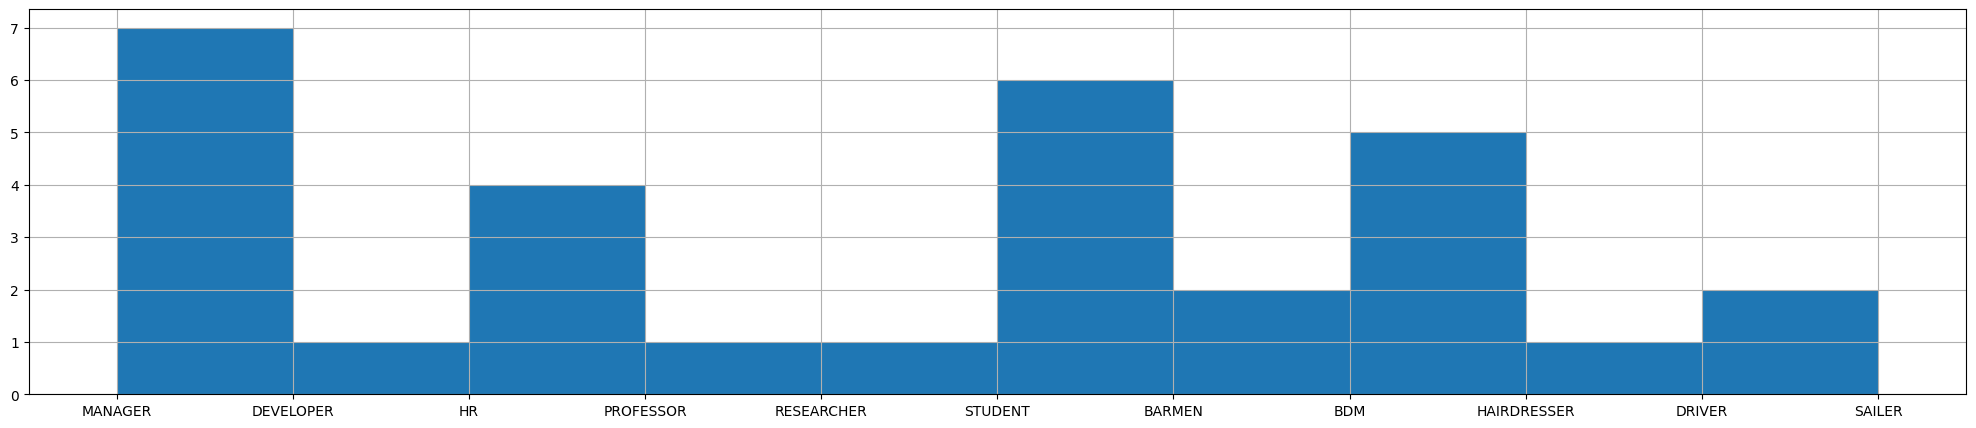

In [242]:
# distribution after cleaning
data["Profession"].hist(figsize=(25,5))

In [243]:
# check if went as planned
profiler.nullColumns(data)


TOTAL MISSING VALUES FOR EACH COLUMN :


,MISSING VALUES
TransactionID,0
ClientID,0
BirthYear,2
Amount,0
Profession,0
Department,0
Risk,0
Profession_Label,0
Profession_KNN,0


Yup.. kay, next.

#### **BirthYear** column

<Axes: >

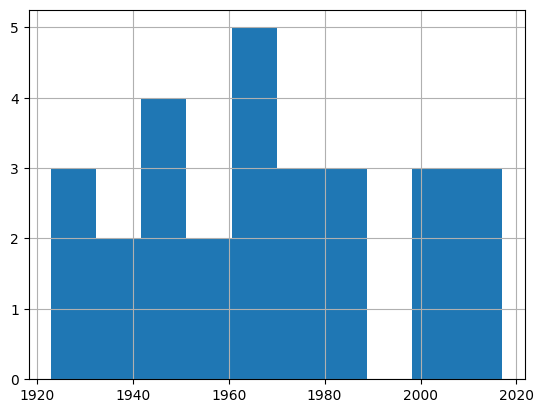

In [244]:
data["BirthYear"].hist()

In [245]:
# retrieve people born between 1955 and 1985
data[data["BirthYear"].between(1955, 1985)]

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk,Profession_Label,Profession_KNN
10,8,34989,1958.00,14550,HR,78,High,5,5.00
11,6,34987,1967.00,10110,MANAGER,78,Medium,6,6.00
12,15,34987,1967.00,30090,MANAGER,78,Low,6,6.00
13,24,34989,1967.00,27870,HR,78,Medium,5,5.00
14,27,35008,1967.00,41930,BDM,78,Low,1,1.00
15,28,35008,1967.00,46370,BDM,78,High,1,1.00
16,29,35008,1976.00,50810,BDM,78,Medium,1,1.00
17,5,34986,1978.00,7890,HR,78,High,5,5.00
18,17,34998,1978.00,7890,STUDENT,78,Medium,10,10.00


In [246]:
# first, replace NaN values with random integers to facilitate data type conversion,
data["BirthYear"].fillna(-1, inplace=True)

# and then address the imputation of missing values later on
data["BirthYear"] = data["BirthYear"].astype(int)

In [247]:
# check rows with imputated BirthYear
data[data["BirthYear"] == -1]

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk,Profession_Label,Profession_KNN
28,22,34987,-1,18990,SAILER,78,High,9,9.00
29,7,34988,-1,12330,MANAGER,78,Medium,6,6.00


In [248]:
# average amount and birth year
data.groupby("Profession")[["Amount", "BirthYear"]].agg(["mean"]).sort_values(("Amount", "mean"))

,Amount,BirthYear
,mean,mean
Profession,,
BARMEN,6780.00,1981.50
STUDENT,14398.33,1977.67
MANAGER,16770.00,1678.14
SAILER,18990.00,-1.00
HR,20840.00,1956.50
RESEARCHER,21210.00,1943.00
PROFESSOR,23430.00,1939.00
DRIVER,25650.00,2017.00


In [249]:
# most frequent amount and birth year
data.groupby("Profession")[["Amount", "BirthYear"]].apply(lambda x: x.mode().iloc[0]).sort_values(by="Amount")

,Amount,BirthYear
Profession,,
BARMEN,1230.00,1948.00
STUDENT,3450.00,1943.00
HR,7890.00,1923.00
MANAGER,16770.00,1967.00
BDM,18990.00,1967.00
SAILER,18990.00,-1.00
RESEARCHER,21210.00,1943.00
PROFESSOR,23430.00,1939.00
DRIVER,25650.00,2017.00


In [250]:
# back to NaN values
data["BirthYear"] = data["BirthYear"].replace(-1, np.nan)

# instance of KNNImputer
imputer = KNNImputer(n_neighbors=3)

# only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# fit and transform the data
imputed = imputer.fit_transform(numeric_data)

# convert back into DataFrame
imputed_df = pd.DataFrame(imputed, columns=numeric_data.columns)

# replace original BirthYear column with the imputed data
data["fixedBirthYear"] = imputed_df["BirthYear"]
data["fixedBirthYear"] = data["fixedBirthYear"].astype(int)

# show
data

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk,Profession_Label,Profession_KNN,fixedBirthYear
0,4,34985,1923.00,5670,MANAGER,78,Low,6,6.00,1923
1,16,34997,1923.00,2399090,DEVELOPER,78,High,2,2.00,1923
2,25,35006,1923.00,33050,HR,78,High,5,5.00,1923
3,12,34993,1939.00,23430,PROFESSOR,78,Low,7,7.00,1939
4,21,35002,1939.00,16770,MANAGER,78,Low,6,6.00,1939
5,11,34992,1943.00,21210,RESEARCHER,78,Medium,8,8.00,1943
6,20,35001,1943.00,14550,STUDENT,78,Medium,10,10.00,1943
7,3,34984,1945.00,3450,STUDENT,78,Medium,10,10.00,1945
8,19,35000,1948.00,12330,BARMEN,78,High,0,0.00,1948
9,9,34990,1953.00,16770,MANAGER,78,Medium,6,6.00,1953


In [251]:
# add age column
from datetime import date

# get the current year
current_year = date.today().year

# calculate age
data["Age"] = current_year - data["fixedBirthYear"]

# tidy up the data a bit
data = data[["TransactionID", "ClientID", "fixedBirthYear", "Age", "Amount", "Profession", "Risk"]].copy()
data

,TransactionID,ClientID,fixedBirthYear,Age,Amount,Profession,Risk
0,4,34985,1923,100,5670,MANAGER,Low
1,16,34997,1923,100,2399090,DEVELOPER,High
2,25,35006,1923,100,33050,HR,High
3,12,34993,1939,84,23430,PROFESSOR,Low
4,21,35002,1939,84,16770,MANAGER,Low
5,11,34992,1943,80,21210,RESEARCHER,Medium
6,20,35001,1943,80,14550,STUDENT,Medium
7,3,34984,1945,78,3450,STUDENT,Medium
8,19,35000,1948,75,12330,BARMEN,High
9,9,34990,1953,70,16770,MANAGER,Medium


Age seems off, specially Barmen and Driver. We can also notice extreme value in the amount spent of the Developer.

The way to handle these unusual age values depends on the specific context and what we know about our data. Here are a few options:

**Outlier removal:**
If we're confident that these ages are not accurate (for instance, if we're sure there are no 100-year-old people in our dataset, or no 6-year-olds), we could treat these as outlier values and remove these records from our dataset.

This could be appropriate if these records are few in number and are not representative of our overall data.


**Imputation:** Another option would be to replace these unusual age values with a more typical value, such as the median or mean age in our dataset. This could be appropriate if we think these unusual ages are the result of data entry errors, for instance.


**Investigation:** If it's plausible that these ages could be correct (for example, if our dataset is supposed to include people of all ages and we have reason to believe there might be 100-year-olds or 6-year-olds in our data), we might want to investigate further to understand why these ages are appearing in our data.

Are they associated with certain professions or risk levels? Do these records have other unusual features?


In [252]:
data[data["Age"].isin([100,6,8,10])]

,TransactionID,ClientID,fixedBirthYear,Age,Amount,Profession,Risk
0,4,34985,1923,100,5670,MANAGER,Low
1,16,34997,1923,100,2399090,DEVELOPER,High
2,25,35006,1923,100,33050,HR,High
25,1,34982,2013,10,12900,STUDENT,Low
26,2,34983,2015,8,1230,BARMEN,High
27,13,34994,2017,6,25650,DRIVER,Medium


We will retain the records where the age is 100, despite the unusually high 'Amount' value associated with the 'Developer' profession. It would be beneficial to consult with the individuals responsible for collecting this data to understand this anomaly better, as there may be a logical explanation for this occurrence.

However, we will eliminate records where ages are below 10. It is highly improbable for a 6-year-old to possess a driver's license or for an 8-year-old to work as a barman. These records likely represent data collection errors and would not contribute valuable or accurate information to our analysis.

In [253]:
# remove records where age is below 10
data = data[data["Age"] >= 10]
data

,TransactionID,ClientID,fixedBirthYear,Age,Amount,Profession,Risk
0,4,34985,1923,100,5670,MANAGER,Low
1,16,34997,1923,100,2399090,DEVELOPER,High
2,25,35006,1923,100,33050,HR,High
3,12,34993,1939,84,23430,PROFESSOR,Low
4,21,35002,1939,84,16770,MANAGER,Low
5,11,34992,1943,80,21210,RESEARCHER,Medium
6,20,35001,1943,80,14550,STUDENT,Medium
7,3,34984,1945,78,3450,STUDENT,Medium
8,19,35000,1948,75,12330,BARMEN,High
9,9,34990,1953,70,16770,MANAGER,Medium


### Part 4: Encode categorical data

In [254]:
encoded_data = pd.get_dummies(data, columns=["Profession", "Risk"])
display(encoded_data)

# BONUS
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["Profession_LabelEncoder"] = le.fit_transform(data["Profession"])
data["Risk_LabelEncoder"] = le.fit_transform(data["Risk"])

# show
data

,TransactionID,ClientID,fixedBirthYear,Age,Amount,Profession_BARMEN,Profession_BDM,Profession_DEVELOPER,Profession_HAIRDRESSER,Profession_HR,Profession_MANAGER,Profession_PROFESSOR,Profession_RESEARCHER,Profession_SAILER,Profession_STUDENT,Risk_High,Risk_Low,Risk_Medium
0,4,34985,1923,100,5670,0,0,0,0,0,1,0,0,0,0,0,1,0
1,16,34997,1923,100,2399090,0,0,1,0,0,0,0,0,0,0,1,0,0
2,25,35006,1923,100,33050,0,0,0,0,1,0,0,0,0,0,1,0,0
3,12,34993,1939,84,23430,0,0,0,0,0,0,1,0,0,0,0,1,0
4,21,35002,1939,84,16770,0,0,0,0,0,1,0,0,0,0,0,1,0
5,11,34992,1943,80,21210,0,0,0,0,0,0,0,1,0,0,0,0,1
6,20,35001,1943,80,14550,0,0,0,0,0,0,0,0,0,1,0,0,1
7,3,34984,1945,78,3450,0,0,0,0,0,0,0,0,0,1,0,0,1
8,19,35000,1948,75,12330,1,0,0,0,0,0,0,0,0,0,1,0,0
9,9,34990,1953,70,16770,0,0,0,0,0,1,0,0,0,0,0,0,1


<ipython-input-254-3dbbfd417638>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Profession_LabelEncoder"] = le.fit_transform(data["Profession"])
<ipython-input-254-3dbbfd417638>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Risk_LabelEncoder"] = le.fit_transform(data["Risk"])


,TransactionID,ClientID,fixedBirthYear,Age,Amount,Profession,Risk,Profession_LabelEncoder,Risk_LabelEncoder
0,4,34985,1923,100,5670,MANAGER,Low,5,1
1,16,34997,1923,100,2399090,DEVELOPER,High,2,0
2,25,35006,1923,100,33050,HR,High,4,0
3,12,34993,1939,84,23430,PROFESSOR,Low,6,1
4,21,35002,1939,84,16770,MANAGER,Low,5,1
5,11,34992,1943,80,21210,RESEARCHER,Medium,7,2
6,20,35001,1943,80,14550,STUDENT,Medium,9,2
7,3,34984,1945,78,3450,STUDENT,Medium,9,2
8,19,35000,1948,75,12330,BARMEN,High,0,0
9,9,34990,1953,70,16770,MANAGER,Medium,5,2


### Part 5: Deliverables

In [256]:
data.to_csv("/content/drive/MyDrive/[01] Data Analytics - IronHack/[06] Courses/Module 1/Week 3/Day 14 - Thursday/[LAB 33] - Data Preparation/data.csv")